In [4]:
import requests
import io

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [5]:
model = ocr_predictor(pretrained=True)

C:\Users\krist\AppData\Local\pypoetry\Cache\virtualenvs\doctr-api-mK3hk-WB-py3.10\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\krist\AppData\Local\pypoetry\Cache\virtualenvs\doctr-api-mK3hk-WB-py3.10\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [6]:
images_urls = [
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fs3.amazonaws.com%2Fisc.pricescout.media%2Freceipts%2F4f90458a968c4905983610b15e5b5e2e.jpeg&f=1&nofb=1&ipt=c9ad1f7f59a2c02b2be4ff5ef2f8fbd84cfa7ae3f65add2d4a31bdf80209be7a&ipo=images',
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fs3.amazonaws.com%2Fisc.pricescout.media%2Freceipts%2F5f6e94390e2b4f7d8622edfa2d5d0f23.jpg&f=1&nofb=1&ipt=45ccfa02d67d549e19c53b1bc9523abbcd22f1391b3a84bd943c641c8c5f5f12&ipo=images',
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.barnorama.com%2Fwp-content%2Fimages%2F2014%2F01%2Freceipts_01%2F12-receipts_01.jpg&f=1&nofb=1&ipt=8099455c0ed12c0081a9c0f3a9403f24852dcdacb3c52858845ffda035cadd9b&ipo=images',
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fexternal-preview.redd.it%2FgPtCLPfXIQhirgFSQ_mwllnLSAtQc88Mf_x67OjaUtk.jpg%3Fauto%3Dwebp%26s%3D83d4ef6e5ff39a3a67b2cb10035c3823d0a5c854&f=1&nofb=1&ipt=2df10e8d328066895f3fd9746246c45e9ca9a376bc1a686926ae3f89d50ba150&ipo=images',
    'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fs3.amazonaws.com%2Fisc.pricescout.media%2Freceipts%2Fa4549875a9fe443cb22bbb68dbad5683.jpg&f=1&nofb=1&ipt=ec71e21dbe2b363ec6445d442c0df22f4da92d1a6ef93c1c4754e9a9db162323&ipo=images'
           ]

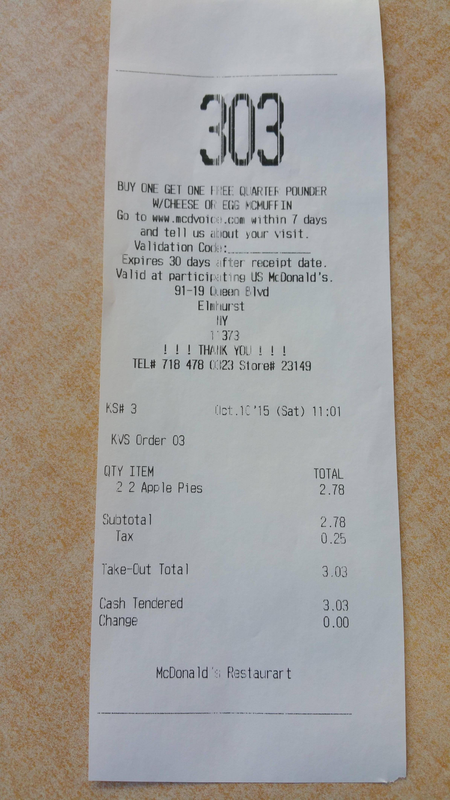

In [42]:
img_bytes = requests.get(images_urls[3]).content
img_fp = io.BytesIO(img_bytes)
img = Image.open(img_fp)
img.thumbnail((800, 800), Image.Resampling.LANCZOS)
img


In [43]:
doc = DocumentFile.from_images(img_bytes)
# Analyze
result = model(doc)
result

Document(
  (pages): [Page(
    dimensions=(4250, 2390)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='303', confidence=1.0)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [
          Line(
            (words): [
              Word(value='BUY', confidence=1.0),
              Word(value='ONE', confidence=1.0),
              Word(value='GET', confidence=1.0),
              Word(value='ONE', confidence=1.0),
              Word(value='FREE', confidence=0.95),
              Word(value='QLARTER', confidence=0.61),
              Word(value='POUNDER', confidence=1.0),
            ]
          ),
          Line(
            (words): [
              Word(value='W/CHEESE', confidence=0.99),
              Word(value='OR', confidence=1.0),
              Word(value='EGG', confidence=1.0),
              Word(value='MCMUFFIN', confidence=0.99),
            ]
          ),
          Line(
            (words): [
              Word(value='Go

In [44]:
def plot_rgb(image):
    plt.figure(figsize=(16, 10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [51]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

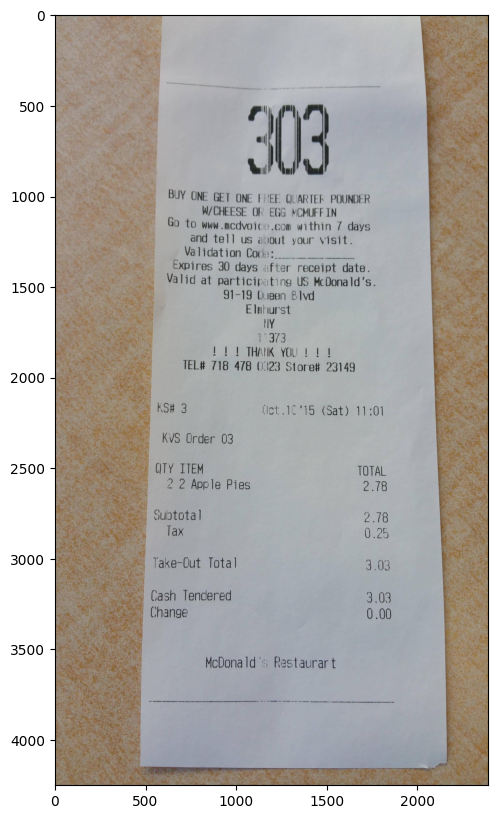

In [45]:
image = np.asarray(bytearray(img_bytes), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
plot_rgb(image)

(4250, 2390, 3)
page
block
line
303 0.9999973773956299 ((0.4404296875, 0.111328125), (0.6357421875, 0.2119140625))
1052 473 1519 900
block
line
BUY 0.9997935891151428 ((0.2587890625, 0.2236328125), (0.3046875, 0.2421875))
618 950 728 1029
ONE 0.9999591112136841 ((0.3125, 0.2275390625), (0.3544921875, 0.2431640625))
746 967 847 1033
GET 0.9999666213989258 ((0.36328125, 0.2275390625), (0.40625, 0.24609375))
868 967 970 1045
ONE 0.9999557733535767 ((0.4150390625, 0.23046875), (0.45703125, 0.24609375))
991 979 1092 1045
FREE 0.9464467167854309 ((0.4658203125, 0.2294921875), (0.5224609375, 0.248046875))
1113 975 1248 1054
QLARTER 0.6082916259765625 ((0.5322265625, 0.232421875), (0.6220703125, 0.2470703125))
1272 987 1486 1050
POUNDER 0.9999345541000366 ((0.634765625, 0.232421875), (0.7275390625, 0.2470703125))
1517 987 1738 1050
line
W/CHEESE 0.9866674542427063 ((0.3388671875, 0.24609375), (0.4443359375, 0.263671875))
809 1045 1061 1120
OR 0.9985300302505493 ((0.4521484375, 0.24609375), (0.

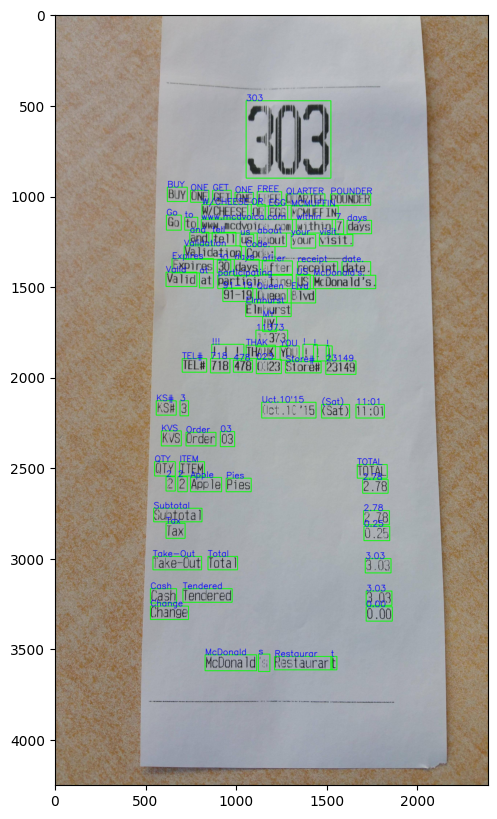

In [48]:
vis = image.copy()
print(vis.shape)
for page in result.pages:
    print("page")
    for block in page.blocks:
        print("block")
        for line in block.lines:
            print("line")
            for word in line.words:
                print(word.value, word.confidence, word.geometry)
                x = int(word.geometry[0][0] * vis.shape[1])
                y = int(word.geometry[0][1] * vis.shape[0])
                x2 = int(word.geometry[1][0] * vis.shape[1])
                y2 = int(word.geometry[1][1] * vis.shape[0])
                print(x, y, x2, y2)
                cv2.rectangle(vis, (x,y), (x2,y2), (0,255,0), 3)

                font = cv2.FONT_HERSHEY_SIMPLEX
                org = (x, y)
                fontScale = 1.5 * vis.shape[1] / 2300
                color = (255, 0, 0)
                thickness = 2
                vis = cv2.putText(vis, word.value, org, font,
                                   fontScale, color, thickness, cv2.LINE_AA)

plot_rgb(vis)


(4250, 2390, 3)
page
block
line
303 0.9999973773956299 ((0.4404296875, 0.111328125), (0.6357421875, 0.2119140625))
1052 473 1519 900
block
line
BUY 0.9997935891151428 ((0.2587890625, 0.2236328125), (0.3046875, 0.2421875))
618 950 728 1029
ONE 0.9999591112136841 ((0.3125, 0.2275390625), (0.3544921875, 0.2431640625))
746 967 847 1033
GET 0.9999666213989258 ((0.36328125, 0.2275390625), (0.40625, 0.24609375))
868 967 970 1045
ONE 0.9999557733535767 ((0.4150390625, 0.23046875), (0.45703125, 0.24609375))
991 979 1092 1045
FREE 0.9464467167854309 ((0.4658203125, 0.2294921875), (0.5224609375, 0.248046875))
1113 975 1248 1054
QLARTER 0.6082916259765625 ((0.5322265625, 0.232421875), (0.6220703125, 0.2470703125))
1272 987 1486 1050
POUNDER 0.9999345541000366 ((0.634765625, 0.232421875), (0.7275390625, 0.2470703125))
1517 987 1738 1050
line
W/CHEESE 0.9866674542427063 ((0.3388671875, 0.24609375), (0.4443359375, 0.263671875))
809 1045 1061 1120
OR 0.9985300302505493 ((0.4521484375, 0.24609375), (0.

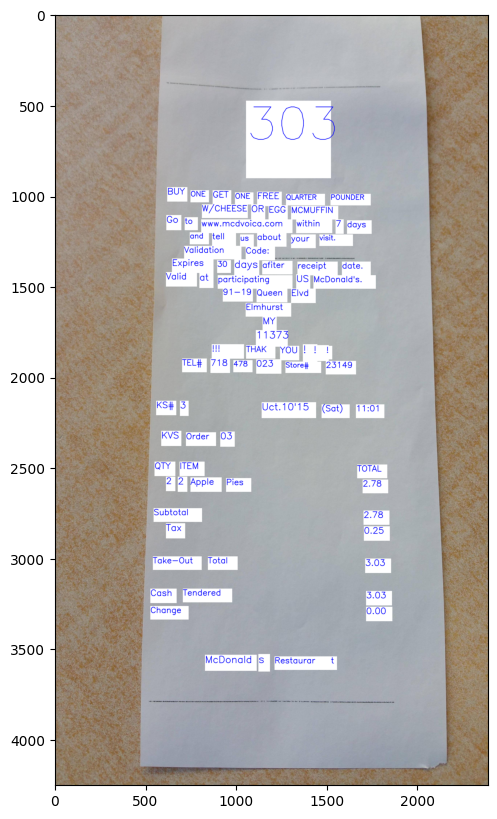

In [66]:
vis = image.copy()
print(vis.shape)
for page in result.pages:
    print("page")
    for block in page.blocks:
        print("block")
        for line in block.lines:
            print("line")
            for word in line.words:
                print(word.value, word.confidence, word.geometry)
                x = int(word.geometry[0][0] * vis.shape[1])
                y = int(word.geometry[0][1] * vis.shape[0])
                x2 = int(word.geometry[1][0] * vis.shape[1])
                y2 = int(word.geometry[1][1] * vis.shape[0])
                print(x, y, x2, y2)
                cv2.rectangle(vis, (x,y), (x2,y2), (255,255,255), -1)

                font = cv2.FONT_HERSHEY_SIMPLEX
                org = (x, int((y+y2)/2))
                fontScale = 0.02 * abs(y - y2)
                color = (255, 0, 0)
                thickness = 2
                vis = cv2.putText(vis, word.value, org, font,
                                   fontScale, color, thickness, cv2.LINE_AA)

plot_rgb(vis)